# Visualizing data for exploration and communication

![](http://style.org/images/stdp2/STDP2_095.jpg)  
Jonathan Corum,  http://style.org/stdp2/

![](http://style.org/images/stdp2/STDP2_096.jpg)  
  
Jonathan Corum,  http://style.org/stdp2/

### import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### set defaults for plotting

In [2]:
sns.set_context('talk')
sns.set_style('ticks')

### define data

In [3]:
co2_df = pd.read_csv('../myData/co2Wikipedia.csv',index_col=[0])
co2_df.tail()

,Country,FossilfuelCO2emissions(kt)in2015[8],%FossilfuelCO2emissionsbycountry,Emissionspercapita(t)in2015[9],"Emissions(kg)per$1,000ofGDP(2010US$)in2014[10]"
45,Belgium,97002,0.27%,8.6,186.4
46,Azerbaijan,38000,0.10%,3.9,642.1
47,Australia,446348,1.24%,18.6,281.8
48,Argentina,191199,0.53%,4.4,459.8
49,Algeria,147692,0.41%,3.7,795.0


In [4]:
pop_df = pd.read_csv('../myData/popWikipedia.csv', index_col=[0])
pop_df.tail()

,Rank,Country,Population,Date,%ofworldpopulation,Source
236,–,Niue,1611.0,"September10,2011",0.000021%,2011censusresult
237,–,Tokelau(NZ),1499.0,"October18,2016",0.000020%,2016censusresult
238,197,VaticanCity,800.0,"January1,2014",0.000010%,Officialestimate
239,–,Cocos(Keeling)Islands(Australia),544.0,"August9,2016",0.0000071%,2016censusresult
240,–,PitcairnIslands(UK),50.0,"January1,2018",0.00000065%,Officialestimate


In [5]:
countries_df = pd.merge(co2_df, pop_df, on='Country')
countries_df.index = countries_df.loc[:, 'Country']
countries_df.tail()

,Country,FossilfuelCO2emissions(kt)in2015[8],%FossilfuelCO2emissionsbycountry,Emissionspercapita(t)in2015[9],"Emissions(kg)per$1,000ofGDP(2010US$)in2014[10]",Rank,Population,Date,%ofworldpopulation,Source
Country,,,,,,,,,,
Belgium,Belgium,97002,0.27%,8.6,186.4,79,11420163.0,"August1,2018",0.15%,Monthlyofficialestimate
Azerbaijan,Azerbaijan,38000,0.10%,3.9,642.1,91,9943226.0,"August1,2018",0.13%,Officialestimate
Australia,Australia,446348,1.24%,18.6,281.8,53,25107000.0,"October29,2018",0.328%,Officialpopulationclock
Argentina,Argentina,191199,0.53%,4.4,459.8,31,44494502.0,"July1,2018",0.58%,Officialannualprojection
Algeria,Algeria,147692,0.41%,3.7,795.0,32,42545964.0,"July1,2018",0.56%,Officialannualprojection


In [6]:
countries_df = countries_df.loc[:, ['Population', 'FossilfuelCO2emissions(kt)in2015[8]']]
countries_df.columns = ['population', 'co2']
countries_df.loc[:,'population'] = countries_df.loc[:, 'population'] / 1000000000.
countries_df.loc[:, 'co2'] = countries_df.loc[:, 'co2'] / 1000000.

countries_df.tail()

,population,co2
Country,,
Belgium,0.011420,0.097002
Azerbaijan,0.009943,0.038000
Australia,0.025107,0.446348
Argentina,0.044495,0.191199
Algeria,0.042546,0.147692


### simple plot

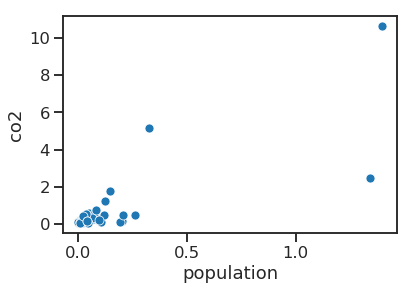

In [7]:
sns.scatterplot(data=countries_df, x='population', y='co2')

### annotated plot

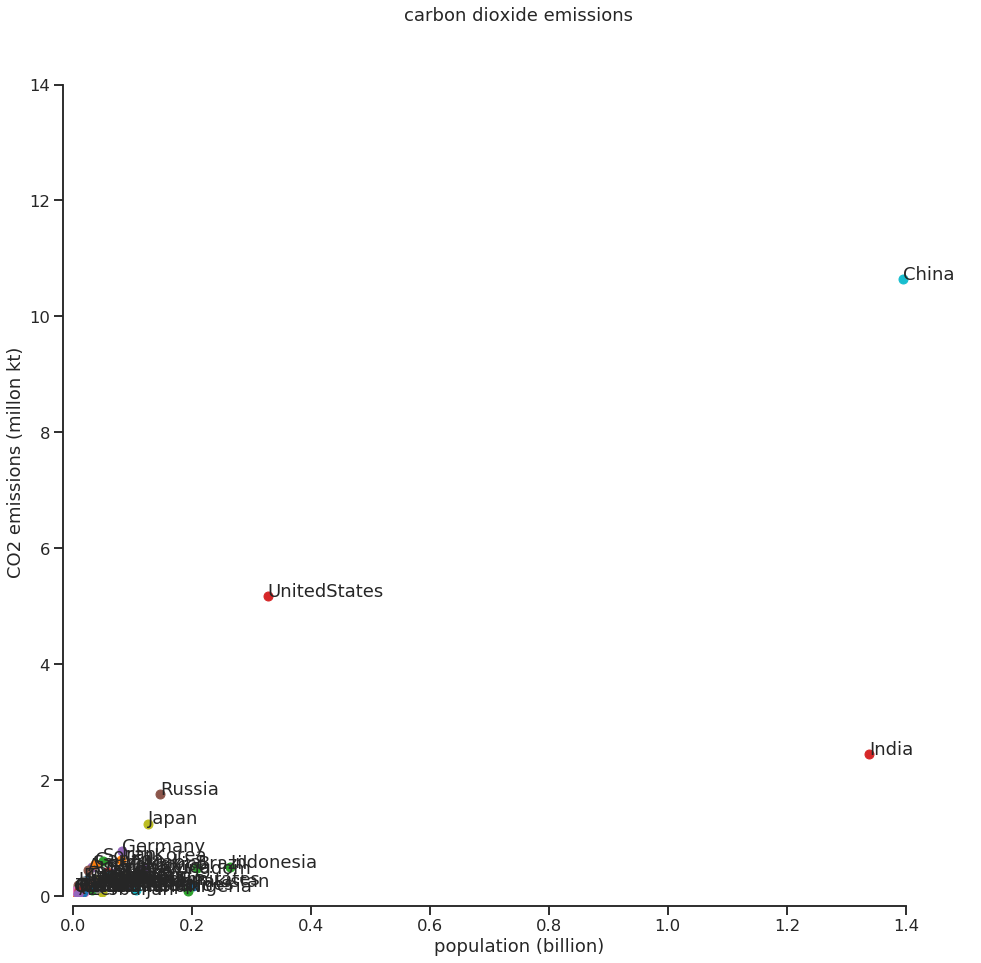

In [8]:
# Controls size and aspect ratio of the figure
plt.figure(figsize=(16, 16))

# Move through row names of the table
for i in countries_df.index:

    # For each iteration of the loop:

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o')
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i  # String printed for annotation
    )

# Range of axes
plt.xlim(0, 1.5)
plt.ylim(0, 15)

# Label the axes
plt.xlabel('population (billion)')
plt.ylabel('CO2 emissions (millon kt)')
# Title of plot
plt.title('carbon dioxide emissions')

sns.despine(
    offset=10,  # Gap between x and y axis at origin
    trim=True  # End axis at last 'tick'
)

# Show the figure
plt.show()

### Further explorations

In [9]:
ratio_df = pd.DataFrame(countries_df.loc[:, 'co2'] / countries_df.loc[:, 'population'])
ratio_df.columns = ['co2/pop']
ratio_df.sort_values(by='co2/pop', inplace=True, ascending=False)

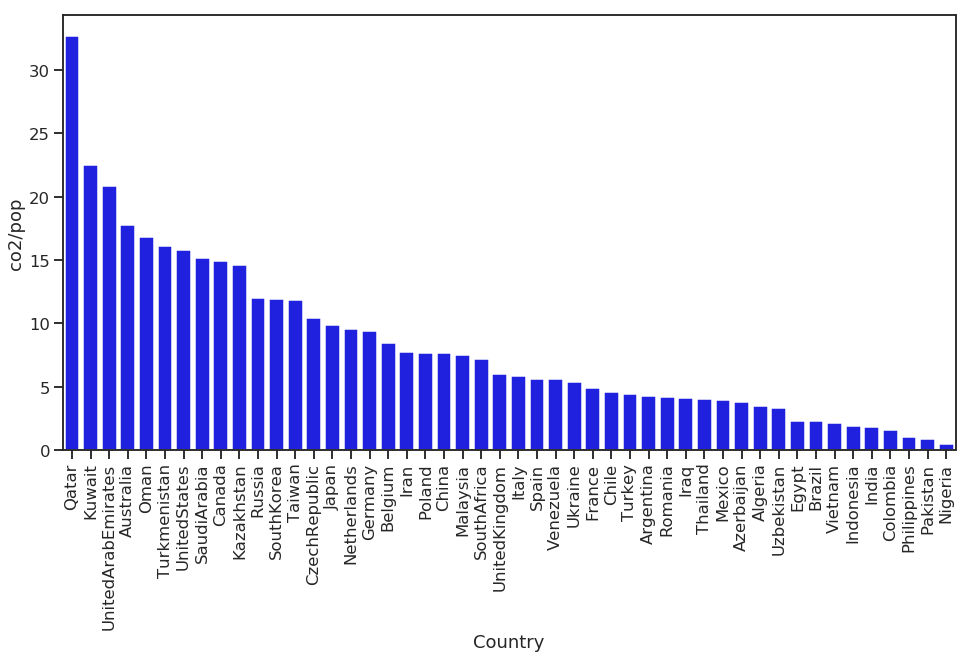

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(y="co2/pop", x=ratio_df.index, data=ratio_df, ax=ax, color="b")
plt.xticks(rotation=90)
plt.show()

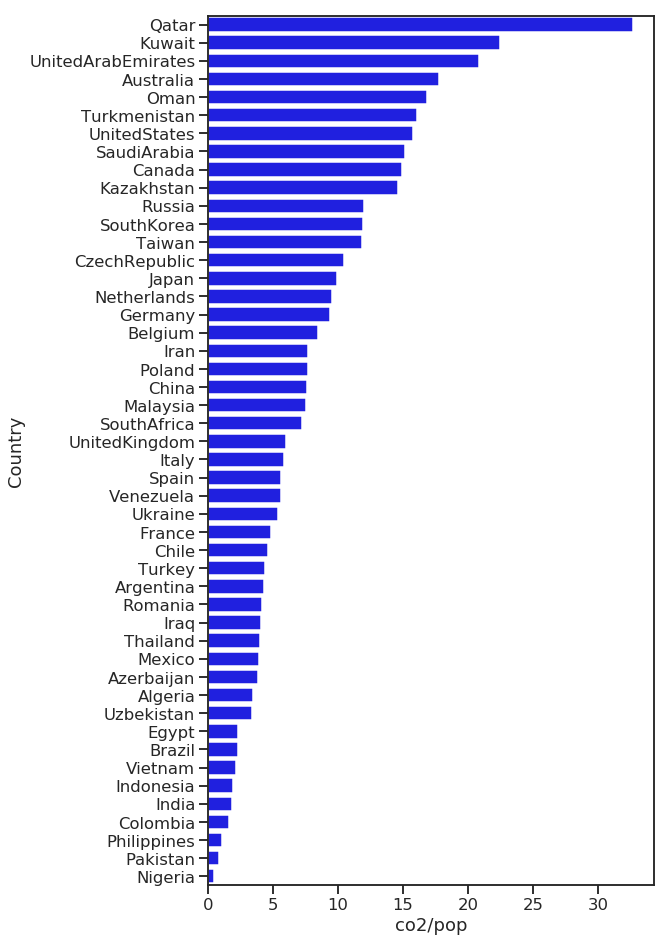

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
sns.barplot(x="co2/pop", y=ratio_df.index, data=ratio_df, ax=ax, color="b")
plt.show()

In [12]:
sns.set_color_codes('muted')

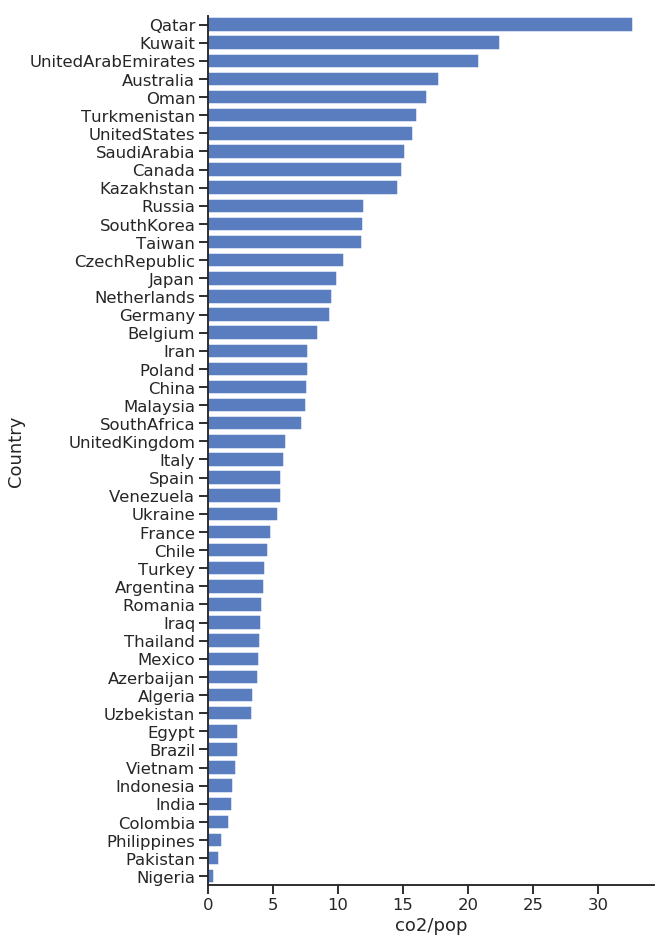

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
sns.barplot(x="co2/pop", y=ratio_df.index, data=ratio_df, ax=ax, color="b")
sns.despine()
plt.show()

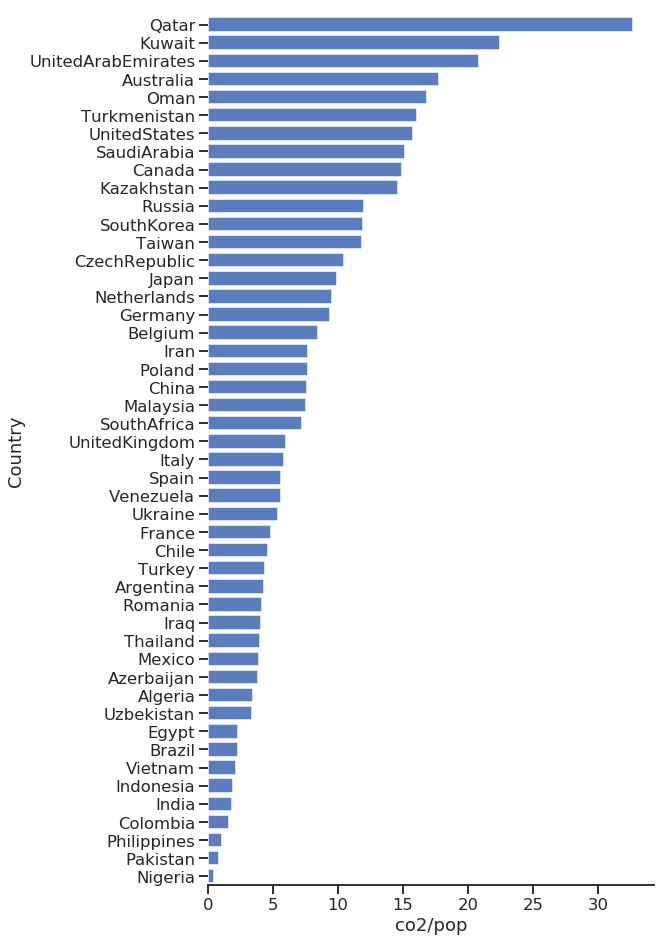

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
sns.barplot(x="co2/pop", y=ratio_df.index, data=ratio_df, ax=ax, color="b")
sns.despine(left=True)
plt.show()

In [15]:
mean_ratio = ratio_df.loc[:, 'co2/pop'].mean()
mean_ratio

8.266085839435544

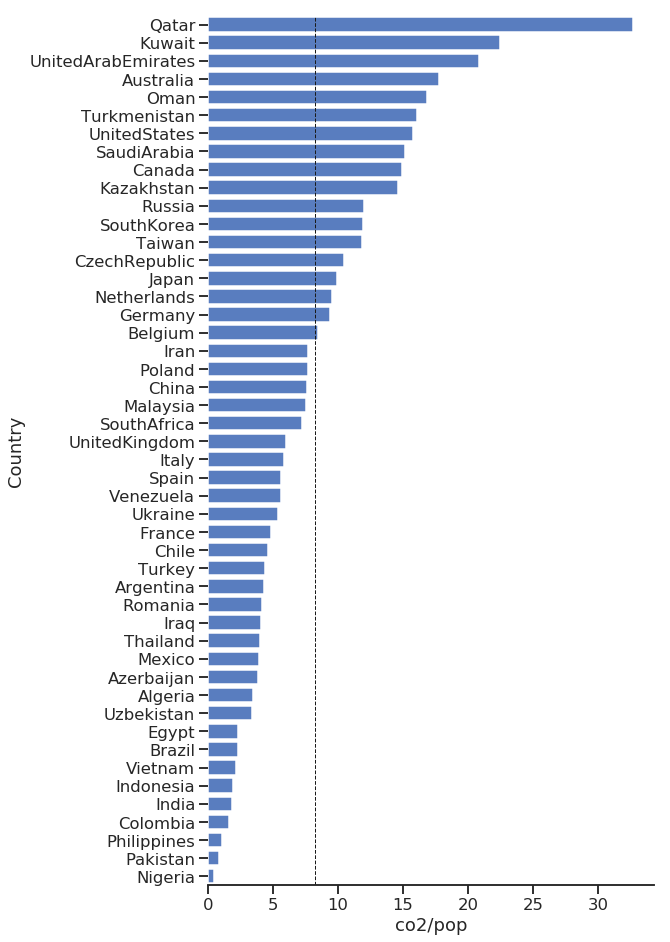

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
sns.barplot(x="co2/pop", y=ratio_df.index, data=ratio_df, ax=ax, color="b")
sns.despine(left=True)
plt.axvline(mean_ratio, linestyle='dashed', color='k', linewidth=1)
plt.show()

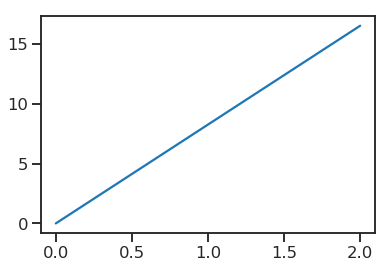

In [17]:
x = np.arange(0, 2.01, 0.1)
y = [xi * mean_ratio for xi in x]

plt.plot(x, y)

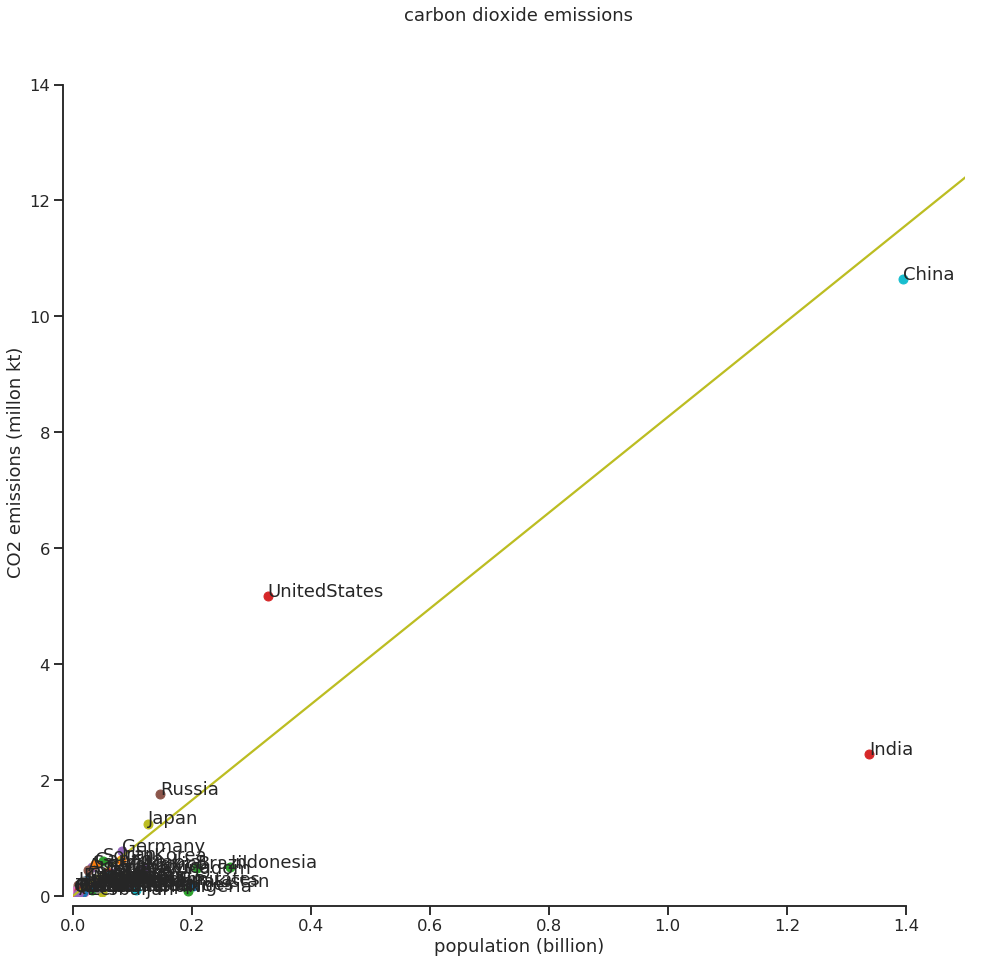

In [18]:
# Controls size and aspect ratio of the figure
plt.figure(figsize=(16, 16))

# Move through row names of the table
for i in countries_df.index:

    # For each iteration of the loop:

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o')
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i  # String printed for annotation
    )

# add average
x = np.arange(0, 2.01, 0.1)
y = [xi * mean_ratio for xi in x]

plt.plot(x, y)

# Range of axes
plt.xlim(0, 1.5)
plt.ylim(0, 15)

# Label the axes
plt.xlabel('population (billion)')
plt.ylabel('CO2 emissions (millon kt)')
# Title of plot
plt.title('carbon dioxide emissions')

sns.despine(
    offset=10,  # Gap between x and y axis at origin
    trim=True  # End axis at last 'tick'
)

# Show the figure
plt.show()

In [19]:
def make_annot(i):

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10)
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i  # String printed for annotation
    )

In [20]:
from ipywidgets import interact

In [21]:
interact(
    make_annot, i=countries_df.index)

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…

In [22]:
def make_annot(i):

    # Controls size and aspect ratio of the figure
    plt.figure(figsize=(16, 16))

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10, c='r')
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i,  # String printed for annotation
        fontsize=32,
    )

    # Get population value for all countries (rows)
    x_vals = countries_df.loc[:, 'population']
    # Get co2 value for all countries (rows)
    y_vals = countries_df.loc[:, 'co2']

    # Plot the data points at x and y
    plt.plot(x_vals, y_vals, 'o', c='b', alpha=0.5)

    # add average
    x = np.arange(0, 2.01, 0.1)
    y = [xi * mean_ratio for xi in x]

    plt.plot(x, y)

    # Range of axes
    plt.xlim(0, 1.5)
    plt.ylim(0, 15)

    # Label the axes
    plt.xlabel('population (billion)')
    plt.ylabel('CO2 emissions (millon kt)')
    # Title of plot
    plt.title('carbon dioxide emissions')

    sns.despine(
        offset=10,  # Gap between x and y axis at origin
        trim=True  # End axis at last 'tick'
    )

    # Show the figure
    plt.show()

In [23]:
interact(
    make_annot, i=countries_df.index)

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…

In [24]:
def make_annot(i, my_xlim, my_ylim):

    # Controls size and aspect ratio of the figure
    plt.figure(figsize=(16, 16))

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10, c='r')
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i,  # String printed for annotation
        fontsize=32,
    )

    # Get population value for all countries (rows)
    x_vals = countries_df.loc[:, 'population']
    # Get co2 value for all countries (rows)
    y_vals = countries_df.loc[:, 'co2']

    # Plot the data points at x and y
    plt.plot(x_vals, y_vals, 'o', c='b', alpha=0.5)

    # add average
    x = np.arange(0, 2.01, 0.1)
    y = [xi * mean_ratio for xi in x]

    plt.plot(x, y)

    # Range of axes
    plt.xlim(0, my_xlim)
    plt.ylim(0, my_ylim)

    # Label the axes
    plt.xlabel('population (billion)')
    plt.ylabel('CO2 emissions (millon kt)')
    # Title of plot
    plt.title('carbon dioxide emissions')

    sns.despine(
        offset=10,  # Gap between x and y axis at origin
        trim=True  # End axis at last 'tick'
    )

    # Show the figure
    plt.show()

In [25]:
interact(
    make_annot,
    i=countries_df.index,
    my_xlim=(0, 1.5, 0.1),
    my_ylim=(0, 15, 1))

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…

In [26]:
def make_annot(i, my_zoom):

    # Controls size and aspect ratio of the figure
    plt.figure(figsize=(16, 16))

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10, c='r')
    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i,  # String printed for annotation
        fontsize=32,
    )

    # Get population value for all countries (rows)
    x_vals = countries_df.loc[:, 'population']
    # Get co2 value for all countries (rows)
    y_vals = countries_df.loc[:, 'co2']

    # Plot the data points at x and y
    plt.plot(x_vals, y_vals, 'o', c='b', alpha=0.5)

    # add average
    x = np.arange(0, 2.01, 0.1)
    y = [xi * mean_ratio for xi in x]

    plt.plot(x, y)

    # Range of axes
    plt.xlim(0, 1.5 / my_zoom)
    plt.ylim(0, 15 / my_zoom)

    # Label the axes
    plt.xlabel('population (billion)')
    plt.ylabel('CO2 emissions (millon kt)')
    # Title of plot
    plt.title('carbon dioxide emissions')

    sns.despine()

    # Show the figure
    plt.show()

In [27]:
interact(
    make_annot, 
    i=countries_df.index, 
    my_zoom=(1, 20, 1))

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…

In [28]:
def make_annot(i, my_zoom):

    # Controls size and aspect ratio of the figure
    plt.figure(figsize=(16, 16))

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10, c='r')

    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i,  # String printed for annotation
        fontsize=32,
    )

    # Move through row names of the table
    for j in countries_df.index:

        # For each iteration of the loop:

        # Get population value for country i
        x_val = countries_df.loc[j, 'population']
        # Get co2 value for country i
        y_val = countries_df.loc[j, 'co2']

        plt.annotate(
            xy=(x_val, y_val),  # Position of annotation
            s=j,  # String printed for annotation
            alpha=0.9)

    # Get population value for all countries (rows)
    x_vals = countries_df.loc[:, 'population']
    # Get co2 value for all countries (rows)
    y_vals = countries_df.loc[:, 'co2']

    # Plot the data points at x and y
    plt.plot(x_vals, y_vals, 'o', c='b', alpha=0.5)

    # add average
    x = np.arange(0, 2.01, 0.1)
    y = [xi * mean_ratio for xi in x]

    plt.plot(x, y)

    # Range of axes
    plt.xlim(0, 1.5 / my_zoom)
    plt.ylim(0, 15 / my_zoom)

    # Label the axes
    plt.xlabel('population (billion)')
    plt.ylabel('CO2 emissions (millon kt)')
    # Title of plot
    plt.title('carbon dioxide emissions')

    sns.despine()

    # Show the figure
    plt.show()

In [29]:
interact(
    make_annot, 
    i=countries_df.index, 
    my_zoom=(1, 20, 1))

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…

In [30]:
def make_annot(i, my_zoom):

    # Controls size and aspect ratio of the figure
    plt.figure(figsize=(16, 16))

    # Get population value for country i
    x_val = countries_df.loc[i, 'population']
    # Get co2 value for country i
    y_val = countries_df.loc[i, 'co2']

    # Plot the data points at x and y
    plt.plot(x_val, y_val, 'o', markersize=10, c='r')

    # Annotate the points
    plt.annotate(
        xy=(x_val, y_val),  # Position of annotation
        s=i,  # String printed for annotation
        fontsize=32,
    )

    # Move through row names of the table
    for j in countries_df.index.drop(i):

        # For each iteration of the loop:

        # Get population value for country i
        x_val = countries_df.loc[j, 'population']
        # Get co2 value for country i
        y_val = countries_df.loc[j, 'co2']

        plt.annotate(
            xy=(x_val, y_val),  # Position of annotation
            s=j,  # String printed for annotation
            alpha=0.9)

    # Get population value for all countries (rows)
    x_vals = countries_df.loc[:, 'population']
    # Get co2 value for all countries (rows)
    y_vals = countries_df.loc[:, 'co2']

    # Plot the data points at x and y
    plt.plot(x_vals, y_vals, 'o', c='b', alpha=0.5)

    # add average
    x = np.arange(0, 2.01, 0.1)
    y = [xi * mean_ratio for xi in x]

    plt.plot(x, y)

    # Range of axes
    plt.xlim(0, 1.5 / my_zoom)
    plt.ylim(0, 15 / my_zoom)

    # Label the axes
    plt.xlabel('population (billion)')
    plt.ylabel('CO2 emissions (millon kt)')
    # Title of plot
    plt.title('carbon dioxide emissions')

    sns.despine()

    # Show the figure
    plt.show()

In [31]:
interact(
    make_annot, 
    i=countries_df.index, 
    my_zoom=(1, 20, 1))

interactive(children=(Dropdown(description='i', options=('Vietnam', 'Venezuela', 'Uzbekistan', 'UnitedStates',…